## Data paths

In [336]:
DATA_PATH = r"D:\datasets_complete\datasets-projects\online+retail+ii\online_retail_II.xlsx"


<unknown>:122: SyntaxWarning: invalid escape sequence '\d'
<unknown>:122: SyntaxWarning: invalid escape sequence '\d'


In [337]:
# Run this once at the start of the notebook
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Data Variable Information
**InvoiceNo**: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.

**StockCode**: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.

**Description**: Product (item) name. Nominal.

**Quantity**: The quantities of each product (item) per transaction. Numeric.

**InvoiceDate**: Invice date and time. Numeric. The day and time when a transaction was generated.

**UnitPrice**: Unit price. Numeric. Product price per unit in sterling (£).

*CustomerID*: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.

**Country**: Country name. Nominal. The name of the country where a customer resides.

[Link to info](https://archive.ics.uci.edu/dataset/502/online+retail+ii)

# Pipeline logic

In [338]:
    # # 1. Normalize column names
    # df = normalize_column_names(df)

    # # 2. Column 'invoice' to string
    # df = df_column_to_string(df, "invoice", show_head=False)

    # # 3 Filter out rows where 'invoice' starts with 'C'
    # df_cancellation_invoices = filter_rows_starting_with(df, "invoice", "C")

    # # 4. Remove and display unique prefixes in 'invoice' column
    # remove_and_display_unique_prefixes(df, "invoice")

    # # 5 Column 'stockcode' to string
    # df_column_to_string(df, 'stockcode')

    # # 6. Remove abnormal codes
    # stockcodes_abnormal, count_abnormal = get_abnormal_values(df, 'stockcode', print_list=True)

    # # 7 Filter out abnormal invoices ( exclude NOT 6 consecutive digits)
    # df, mask, entries_dropped = filter_consecutive_digits(df, 'invoice', 6) 
    # print("Entries dropped:", entries_dropped)

    # # 8 Drop abnormal stockcodes by list
    # df = exclude_values_by_list(df, "stockcode", stockcodes_abnormal)

    # # 9. Drop NA, duplicates, zero price
    # df = drop_na_duplicates_and_zeroes(df)


# Imports

In [339]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

# from pipeline_test import cleaning_pipeline


In [340]:
import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
path_to_functions = os.path.join(project_root, '1-cluster_retail_uci', 'src')

sys.path.append(path_to_functions)
from functions import * # For EDA stages and other utilities
from pipeline import cleaning_pipeline # For the cleaning pipeline function that includes everything in functions.py


In [341]:
# ######## Debugging path issues ########
# attempt = 'ds_projects_collabs/1-cluster_retail-uci/functions'

# # Where Python thinks your notebook is
# cwd = os.getcwd()

# # The full path Python calculated
# full = os.path.join(cwd, attempt)

# print(f"1. Current Working Directory: {cwd}")
# print(f"2. Does the calculated path exist? {os.path.exists(full)}")
# print(f"3. Calculated Full Path: {full}")

# # List what is actually in the 'ds_projects_collabs' folder to check for typos
# collabs_path = os.path.join(cwd, 'ds_projects_collabs')
# if os.path.exists(collabs_path):
#     print(f"\n4. Folders found inside 'ds_projects_collabs':")
#     print([f for f in os.listdir(collabs_path) if os.path.isdir(os.path.join(collabs_path, f))])


## Data read and dataframe creation (`PANDAS`)

In [342]:
# Enable the following lines to load data from excel files.
# df = pd.read_excel(DATA_PATH, sheet_name="Year 2010-2011")
# df_b = pd.read_excel(DATA_PATH, sheet_name="Year 2009-2010")


In [343]:
# Enable the following lines to save the dataframes as pickle files.
# Saved to avoid re-loading the excel file.
# df.to_pickle('df_2010-2011.pkl')
# df_b.to_pickle('df_2009-2010.pkl')


In [344]:
# Load the pre-saved pickle file
df_a_raw = pd.read_pickle('df_2010-2011.pkl')
df_b_raw = pd.read_pickle('df_2009-2010.pkl')
display(df_a_raw.head())
display(df_b_raw.head())

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [345]:
df_a = df_a_raw.copy()


# 'df_a' is the raw input data
df_ready_a = cleaning_pipeline(df_a)
# Verify the final result
print("\nFinal Cleaned DataFrame Info:")
display(df_ready_a.info()) # This dataframe is ready for analysis
# df_ready_a.to_pickle('df_cleaned_2010-2011.pkl') # Save cleaned dataframe

'invoice' converted to string type.
object
Filtered rows where 'invoice' starts with 'C'
     invoice stockcode                       description  quantity  \
141  C536379         D                          Discount        -1   
154  C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235  C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236  C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237  C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   

            invoicedate  price  customer_id         country  
141 2010-12-01 09:41:00  27.50      14527.0  United Kingdom  
154 2010-12-01 09:49:00   4.65      15311.0  United Kingdom  
235 2010-12-01 10:24:00   1.65      17548.0  United Kingdom  
236 2010-12-01 10:24:00   0.29      17548.0  United Kingdom  
237 2010-12-01 10:24:00   0.29      17548.0  United Kingdom  
Results for prefix: 'C'


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


Results for prefix: 'A'


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


'stockcode' converted to string type.
object
33 abnormal values:
['POST', 'D', 'C2', 'DOT', 'M', 'BANK CHARGES', 'S', 'AMAZONFEE', 'DCGS0076', 'DCGS0003', 'gift_0001_40', 'DCGS0070', 'm', 'gift_0001_50', 'gift_0001_30', 'gift_0001_20', 'DCGS0055', 'DCGS0072', 'DCGS0074', 'DCGS0069', 'DCGS0057', 'DCGSSBOY', 'DCGSSGIRL', 'gift_0001_10', 'PADS', 'DCGS0004', 'DCGS0073', 'DCGS0071', 'DCGS0066P', 'DCGS0068', 'DCGS0067', 'B', 'CRUK']
Entries dropped: 9291
Removed 2409 rows where 'stockcode' was in the exclusion list.
Number of duplicated rows: 5187
Duplicated rows (sorted):


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom


Duplicates dropped.
Rows with price equal to 0:


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1510,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1985,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1986,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
2022,536552,20950,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom


Rows with price equal to 0 removed.

Final Cleaned DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 391150 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   invoice      391150 non-null  object        
 1   stockcode    391150 non-null  object        
 2   description  391150 non-null  object        
 3   quantity     391150 non-null  int64         
 4   invoicedate  391150 non-null  datetime64[ns]
 5   price        391150 non-null  float64       
 6   customer_id  391150 non-null  float64       
 7   country      391150 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 26.9+ MB


None

In [346]:
df_b = df_b_raw.copy()


# 'df_b' is the raw input data
df_ready_b = cleaning_pipeline(df_b)

# Verify the final result
print("\nFinal Cleaned DataFrame Info:")
display(df_ready_b.info()) # This dataframe is ready for analysis
# df_ready_b.to_pickle('df_cleaned_2009-2010.pkl') # Save cleaned dataframe

'invoice' converted to string type.
object
Filtered rows where 'invoice' starts with 'C'
     invoice stockcode                    description  quantity  \
178  C489449     22087       PAPER BUNTING WHITE LACE       -12   
179  C489449    85206A   CREAM FELT EASTER EGG BASKET        -6   
180  C489449     21895  POTTING SHED SOW 'N' GROW SET        -4   
181  C489449     21896             POTTING SHED TWINE        -6   
182  C489449     22083     PAPER CHAIN KIT RETRO SPOT       -12   

            invoicedate  price  customer_id    country  
178 2009-12-01 10:33:00   2.95      16321.0  Australia  
179 2009-12-01 10:33:00   1.65      16321.0  Australia  
180 2009-12-01 10:33:00   4.25      16321.0  Australia  
181 2009-12-01 10:33:00   2.10      16321.0  Australia  
182 2009-12-01 10:33:00   2.95      16321.0  Australia  
Results for prefix: 'C'


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia


Results for prefix: 'A'


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


'stockcode' converted to string type.
object
55 abnormal values:
['POST', 'D', 'DCGS0058', 'DCGS0068', 'DOT', 'M', 'DCGS0004', 'DCGS0076', 'C2', 'BANK CHARGES', 'DCGS0003', 'TEST001', 'gift_0001_80', 'DCGS0072', 'gift_0001_20', 'DCGS0044', 'TEST002', 'gift_0001_10', 'gift_0001_50', 'DCGS0066N', 'gift_0001_30', 'PADS', 'ADJUST', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70', 'gift_0001_90', 'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027', 'DCGS0036', 'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT', 'DCGSLBOY', 'm', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY', 'DCGSLGIRL', 'S', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'B', 'DCGS0041', 'ADJUST2', '47503J ', 'C3', 'SP1002', 'AMAZONFEE']
Entries dropped: 10209
Removed 2470 rows where 'stockcode' was in the exclusion list.
Number of duplicated rows: 6743
Duplicated rows (sorted):


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
379,489517,21491,SET OF THREE VINTAGE GIFT WRAPS,1,2009-12-01 11:34:00,1.95,16329.0,United Kingdom
391,489517,21491,SET OF THREE VINTAGE GIFT WRAPS,1,2009-12-01 11:34:00,1.95,16329.0,United Kingdom
365,489517,21821,GLITTER STAR GARLAND WITH BELLS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
386,489517,21821,GLITTER STAR GARLAND WITH BELLS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
363,489517,21912,VINTAGE SNAKES & LADDERS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom


Duplicates dropped.
Rows with price equal to 0:


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.0,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.0,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.0,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.0,NaN,United Kingdom
3114,489655,20683,NaN,-44,2009-12-01 17:26:00,0.0,NaN,United Kingdom


Rows with price equal to 0 removed.

Final Cleaned DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 399552 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   invoice      399552 non-null  object        
 1   stockcode    399552 non-null  object        
 2   description  399552 non-null  object        
 3   quantity     399552 non-null  int64         
 4   invoicedate  399552 non-null  datetime64[ns]
 5   price        399552 non-null  float64       
 6   customer_id  399552 non-null  float64       
 7   country      399552 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.4+ MB


None

# EDA

This EDA is automated in cells 25 and 26, with df_ready_a & df_ready_b respectively. For transparency the process of how cleaning was implemented you can explore these following cells.

In [347]:
display(df_raw_a.describe())
display(df_raw_a.describe(include=['O'])) # Includes object type columns

,Quantity,InvoiceDate,Price,Customer ID
count,541910.000000,541910,541910.000000,406830.000000
mean,9.552234,2011-07-04 13:35:22.342307584,4.611138,15287.684160
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.080957,NaN,96.759765,1713.603074


,Invoice,StockCode,Description,Country
count,541910,541910,540456,541910
unique,25900,4070,4223,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,1114,2313,2369,495478


In [348]:
# Usage
df = normalize_column_names(df_a_raw) # Implement normalize_column_names function

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   invoice      541910 non-null  object        
 1   stockcode    541910 non-null  object        
 2   description  540456 non-null  object        
 3   quantity     541910 non-null  int64         
 4   invoicedate  541910 non-null  datetime64[ns]
 5   price        541910 non-null  float64       
 6   customer_id  406830 non-null  float64       
 7   country      541910 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [349]:
df_column_names = df.columns.to_list()
# df_column_names


# EDA Notes

Client Clustering

- `541910` entries, `Description` and `Customer ID` do not match the number of entries (missing values).
- Negative values in `Quantity`: `-80995.000000`. It matches the **max** amount.
- Negative values in `Price`: `-11062.060000`.
- `25900` unique `Invoice` values.
- `4070` unique `StockCode` values, meaning 4070 products; but `4223` `Description` values.

### `invoice` column

In [350]:
df[df['quantity']<0].head() # Overview of `quantity` negative values 


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [351]:
# df['invoice'] = df['invoice'].astype('str')
df = df_column_to_string(df, 'invoice') # Using the function to convert 'invoice' column to string type.

df_cancellation_invoices = filter_rows_starting_with(df, 'invoice', 'C')
# df[df['invoice'].str.match("^\\d{6}$") == False] # Regex for NOT 6 consecutive numbers as invoice id

print("Invoices that are cancellations:", df_cancellation_invoices.shape[0]) # According to the data information website


'invoice' converted to string type.
object
Filtered rows where 'invoice' starts with 'C'
     invoice stockcode                       description  quantity  \
141  C536379         D                          Discount        -1   
154  C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235  C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236  C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237  C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   

            invoicedate  price  customer_id         country  
141 2010-12-01 09:41:00  27.50      14527.0  United Kingdom  
154 2010-12-01 09:49:00   4.65      15311.0  United Kingdom  
235 2010-12-01 10:24:00   1.65      17548.0  United Kingdom  
236 2010-12-01 10:24:00   0.29      17548.0  United Kingdom  
237 2010-12-01 10:24:00   0.29      17548.0  United Kingdom  
Invoices that are cancellations: 9288


In [352]:
# Other letters in 'invoice' column
# df['invoice'].str.replace("[0-9]", "", regex=True).unique()
remove_and_display_unique_prefixes(df, 'invoice')

# Output: There are invoices that start with 'C' and 'A' letters.


Results for prefix: 'C'


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


Results for prefix: 'A'


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


## `stockcode` column

In [353]:
df_column_to_string(df, 'stockcode')


'stockcode' converted to string type.
object


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [354]:
# stockcodes_abnormal = df[(df['stockcode'].str.match("^\\d{5}$") == False) & (df['stockcode'].str.match("^\\d{5}[a-zA-Z]+$") == False)]['stockcode'].unique()
# Regex for NOT 5 consecutive numbers or 5 consecutive numbers followed by letters in the values of 'stockcode' column
stockcodes_abnormal, count_abnormal = get_abnormal_values(df, 'stockcode', print_list=True)

# Output: There are some abnormal stockcodes
# print("Abnormal Stockcodes:", stockcodes_abnormal)


33 abnormal values:
['POST', 'D', 'C2', 'DOT', 'M', 'BANK CHARGES', 'S', 'AMAZONFEE', 'DCGS0076', 'DCGS0003', 'gift_0001_40', 'DCGS0070', 'm', 'gift_0001_50', 'gift_0001_30', 'gift_0001_20', 'DCGS0055', 'DCGS0072', 'DCGS0074', 'DCGS0069', 'DCGS0057', 'DCGSSBOY', 'DCGSSGIRL', 'gift_0001_10', 'PADS', 'DCGS0004', 'DCGS0073', 'DCGS0071', 'DCGS0066P', 'DCGS0068', 'DCGS0067', 'B', 'CRUK']


In [355]:
# Show entries witch each abnormal stockcode in stockcodes_abnormal
# display_rows_by_list(df, 'stockcode', stockcodes_abnormal)


**`stockcode` code** | **Description** | **Implementation**
----------|----------|----------
`POST` | Postage charge. Delivery fees? | Exlcude
`D` | Discount applied | Exclude
`C2` | Shipping fee | Exclude
`DOT` | Dotcom purchase | Exclude
`M` | Manual purchase entrie | Exclude
`BANK CHARGES` | Bank fees? | Exclude
`S` | Sample product | Exclude
`AMAZONFEE` | Amazon marketplace fee | Exclude
`DCGS0076` | Gift voucher code 76 | Exclude
`DCGS0003` | Gift voucher code 3 | Exclude
`gift_0001_40` | £40 gift card | Exclude
`DCGS0070` | Gift voucher code 70 | Exclude
`m` | Manual adjustment (lowercase) | Exclude
`gift_0001_50` | £50 gift card | Exclude
`gift_0001_30` | £30 gift card | Exclude
`gift_0001_20` | £20 gift card | Exclude
`DCGS0055` | Gift voucher code 55 | Exclude
`DCGS0072` | Gift voucher code 72 | Exclude
`DCGS0074` | Gift voucher code 74 | Exclude
`DCGS0069` | Gift voucher code 69 | Exclude
`DCGS0057` | Gift voucher code 57 | Exclude
`DCGSSBOY` | Boy's gift voucher | Exclude
`DCGSSGIRL` | Girl's gift voucher | Exclude
`gift_0001_10` | £10 gift card | Exclude
`PADS` | Padding/packaging materials | Exclude Non-sale item
`DCGS0004` | Gift voucher code 4 | Exclude
`DCGS0073` | Gift voucher code 73 | Exclude
`DCGS0071` | Gift voucher code 71 | Exclude
`DCGS0066P` | Gift voucher code 66P | Exclude
`DCGS0068` | Gift voucher code 68 | Exclude
`DCGS0067` | Gift voucher code 67 | Exclude
`B` | Bad debt write-off | Exclude
`CRUK` | Cancer Research UK donation | Exclude

# Data Cleaning

In [356]:
# Copy df to df_clean for cleaning operations
df_clean = df.copy()


In [357]:
original_count = len(df_clean)


### `invoice` Filter out invoice codes that do not match "6 digits". Cancelations are not important for this analysis.

In [358]:
df_column_to_string(df_clean, 'invoice')
df_clean, mask, entries_dropped = filter_consecutive_digits(df_clean, 'invoice', 6) # Six consecutive digits as a rule for invoice IDs
print("Entries dropped:", entries_dropped)
df_clean.describe()


'invoice' converted to string type.
object
Entries dropped: 9291


,quantity,invoicedate,price,customer_id
count,532619.000000,532619,532619.000000,397925.000000
mean,10.240006,2011-07-04 17:06:17.472038400,3.868438,15294.308601
min,-9600.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,1.000000,2011-03-28 12:13:00,1.250000,13969.000000
50%,3.000000,2011-07-20 11:54:00,2.080000,15159.000000
75%,10.000000,2011-10-19 12:21:00,4.130000,16795.000000
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.000000
std,159.593850,NaN,32.470417,1713.172738


### `stockcodes` filter out

In [359]:
df_clean = exclude_values_by_list(df_clean, 'stockcode', stockcodes_abnormal)
df_clean.describe()
# Change in abnormal quantity values after removing abnormal stockcodes.


Removed 2409 rows where 'stockcode' was in the exclusion list.


,quantity,invoicedate,price,customer_id
count,530210.000000,530210,530210.000000,396370.000000
mean,10.256544,2011-07-04 18:23:18.884932096,3.250016,15301.602071
min,-9600.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,1.000000,2011-03-28 12:13:00,1.250000,13975.000000
50%,3.000000,2011-07-20 12:05:00,2.080000,15159.000000
75%,11.000000,2011-10-19 12:35:00,4.130000,16803.000000
max,80995.000000,2011-12-09 12:50:00,649.500000,18287.000000
std,159.899809,NaN,4.373334,1709.982593


In [360]:
# Check if any abnormal stockcode remains
# for code in stockcodes_abnormal:
#     display(df_clean[df_clean['stockcode'] == code].head(10)) 
# Output: No abnormal stockcodes remain.


1. Drop abnormal 'stockcodes'.
2. Filter out invoice codes that do not match "6 consecutive digits".
3. Filter out NaN and Nulls from 'customer_id'.
4. Erase duplicate entries.
5. Drop entries where'price' equals 0.

In [361]:
# def drop_na_duplicates_and_zeroes(df, col_customer='customer_id', col_price='price')
df_clean = drop_na_duplicates_and_zeroes(df_clean)
df_clean.describe()


Number of duplicated rows: 5187
Duplicated rows (sorted):


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom


Duplicates dropped.
Rows with price equal to 0:


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1510,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1985,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1986,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
2022,536552,20950,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom


Rows with price equal to 0 removed.


,quantity,invoicedate,price,customer_id
count,391150.000000,391150,391150.000000,391150.000000
mean,13.145300,2011-07-10 19:37:34.766713600,2.874372,15295.171456
min,1.000000,2010-12-01 08:26:00,0.040000,12346.000000
25%,2.000000,2011-04-07 11:16:00,1.250000,13969.000000
50%,6.000000,2011-07-31 12:05:00,1.950000,15159.000000
75%,12.000000,2011-10-20 12:57:00,3.750000,16794.000000
max,80995.000000,2011-12-09 12:50:00,649.500000,18287.000000
std,180.807831,NaN,4.284738,1710.339033


In [362]:
len(df_clean)/len(df)


0.7217988226827333

## Notes of cleaning process

- Dropped 28% of data

# Feature Engineering

### Strategy

- Total per sale is missing. Added as `sale_total`
- Create profiles based on `customer_id`. Added as new dataframe
- Data confusion matrix to understand better correlation

In [367]:
df_fe = df_ready_a.copy() # Copy dataframe from cell 25 (pipeline output)
df_fe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 391150 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   invoice      391150 non-null  object        
 1   stockcode    391150 non-null  object        
 2   description  391150 non-null  object        
 3   quantity     391150 non-null  int64         
 4   invoicedate  391150 non-null  datetime64[ns]
 5   price        391150 non-null  float64       
 6   customer_id  391150 non-null  float64       
 7   country      391150 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 26.9+ MB


In [368]:
count = (~df_fe['stockcode'].astype(str).str.match(r'^\d{5}$')).sum() # Debug pipeline not filtering correctly
print("Number of abnormal stockcodes in cleaned dataframe:", count)


Number of abnormal stockcodes in cleaned dataframe: 32873


In [369]:
df_fe['sale_total'] = df_fe['quantity'] * df_fe['price'] # Creates new column 'sale_total' that is the product of 'quantity' and 'price' columns
df_fe.head()

,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country,sale_total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [370]:
df_fe = df_fe.groupby(by='customer_id', as_index=False).agg(
    sale_value=('sale_total','sum'), # Total sales value per customer
    frecuency=('invoice','nunique'), # Number of unique invoices per customer (how many times has this client purchased)
    last_invoice_date=('invoicedate','max') # Last invoice date per customer
)
df_fe.head()


,customer_id,sale_value,frecuency,last_invoice_date
0,12346.0,77183.60,1,2011-01-18 10:01:00
1,12347.0,4310.00,7,2011-12-07 15:52:00
2,12348.0,1437.24,4,2011-09-25 13:13:00
3,12349.0,1457.55,1,2011-11-21 09:51:00
4,12350.0,294.40,1,2011-02-02 16:01:00


In [371]:
max_date = df_fe['last_invoice_date'].max() # Whats the latest date in record to calculate recency

df_fe['recency_days'] = (max_date - df_fe['last_invoice_date']).dt.days # Agregate recency in days
print(df_fe.head())
# print(df_fe.describe())


   customer_id  sale_value  frecuency   last_invoice_date  recency_days
0      12346.0    77183.60          1 2011-01-18 10:01:00           325
1      12347.0     4310.00          7 2011-12-07 15:52:00             1
2      12348.0     1437.24          4 2011-09-25 13:13:00            74
3      12349.0     1457.55          1 2011-11-21 09:51:00            18
4      12350.0      294.40          1 2011-02-02 16:01:00           309


Text(0.5, 1.0, 'Sales Value Distribution')

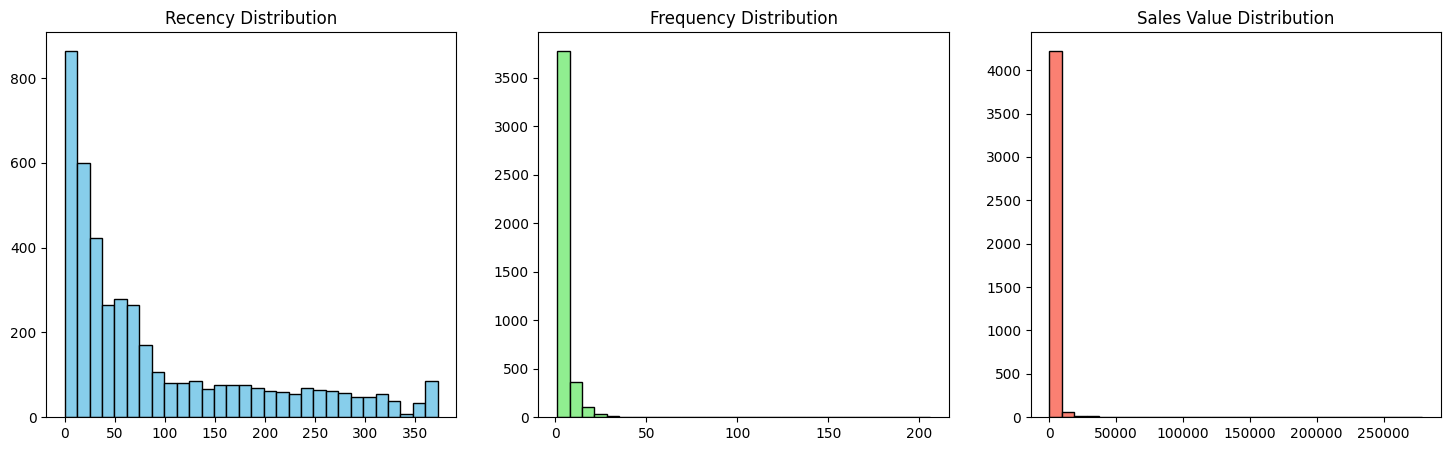

In [372]:
# Graph distributions of RFM features
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
axes[0].hist(df_fe['recency_days'], bins=30, color='skyblue', edgecolor='black')
axes[0].set_title('Recency Distribution')
axes[1].hist(df_fe['frecuency'], bins=30, color='lightgreen', edgecolor='black')
axes[1].set_title('Frequency Distribution')
axes[2].hist(df_fe['sale_value'], bins=30, color='salmon', edgecolor='black')
axes[2].set_title('Sales Value Distribution')


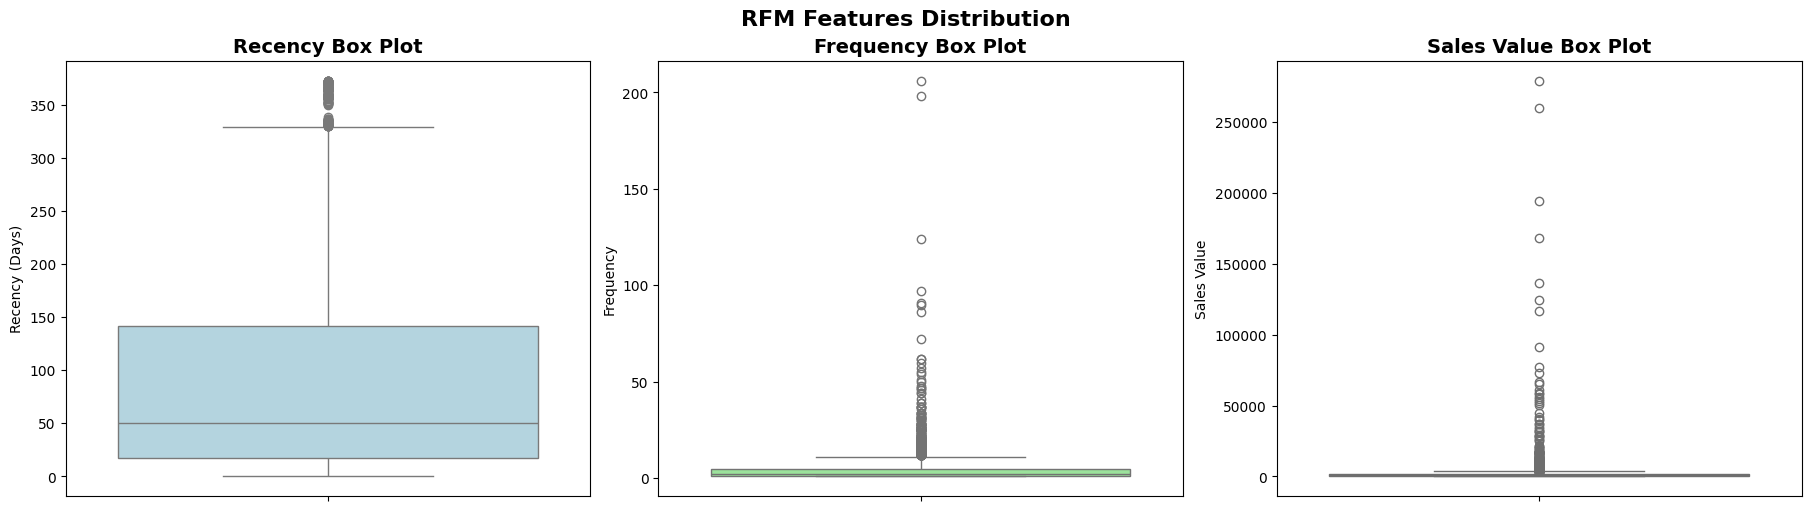

In [373]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5), constrained_layout=True)

# Recency box plot
sns.boxplot(y=df_fe['recency_days'], ax=axes[0], color='lightblue')
axes[0].set_title('Recency Box Plot', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Recency (Days)')

# Frequency box plot
sns.boxplot(y=df_fe['frecuency'], ax=axes[1], color='lightgreen')
axes[1].set_title('Frequency Box Plot', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Frequency')

# Sales value box plot
sns.boxplot(y=df_fe['sale_value'], ax=axes[2], color='lightcoral')
axes[2].set_title('Sales Value Box Plot', fontsize=14, fontweight='bold')
axes[2].set_ylabel('Sales Value')

plt.suptitle('RFM Features Distribution', fontsize=16, fontweight='bold')
plt.show()
